In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense , LSTM
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('C:/Users/lenovo/AMZN.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

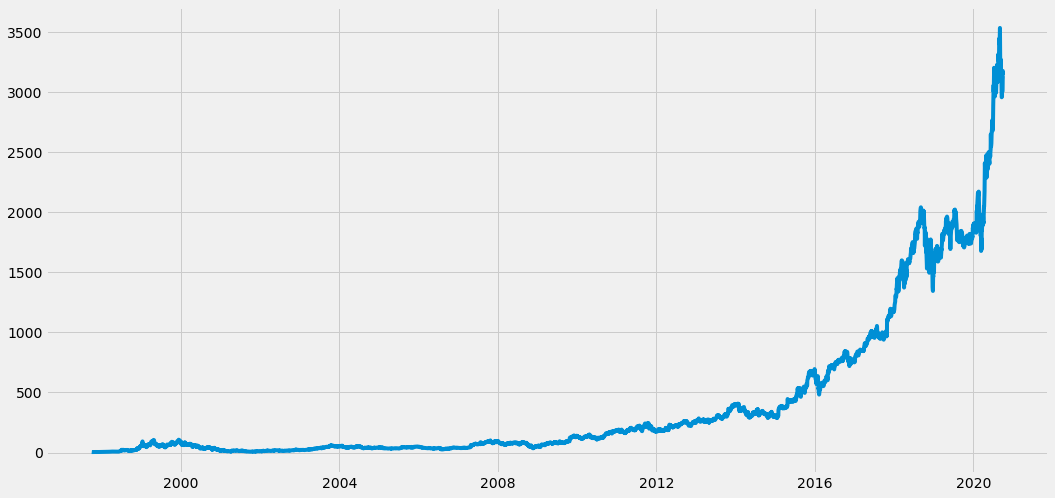

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show()

In [4]:
data=df.filter(['Close'])
dataset=data.values

In [5]:
training_data_len=math.ceil(len(dataset)*0.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [6]:
training_data=scaled_data[0:training_data_len , :]

In [7]:
xtrain=[]
ytrain=[]
n = 60

In [8]:
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])

In [9]:
xtrain , ytrain = np.array(xtrain) , np.array(ytrain)
xtrain=np.reshape(xtrain , (xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(4571, 60, 1)

In [10]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [12]:
model.fit(xtrain,ytrain,epochs=1,batch_size=1)

4571/4571 [==============================] - 171s 37ms/step - loss: 4.2557e-05


In [13]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , :]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , 0])

In [14]:
xtest=np.array(xtest)
xtest=np.reshape(xtest , (xtest.shape[0],xtest.shape[1],1))

In [15]:
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
#root mean squared error
rmse=np.sqrt(np.mean((prediction - ytest)**2))
rmse

37/37 [==============================] - 2s 30ms/step


98.62715852902322

In [16]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction

C:\Users\lenovo\AppData\Local\Temp/ipykernel_23584/3517524298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


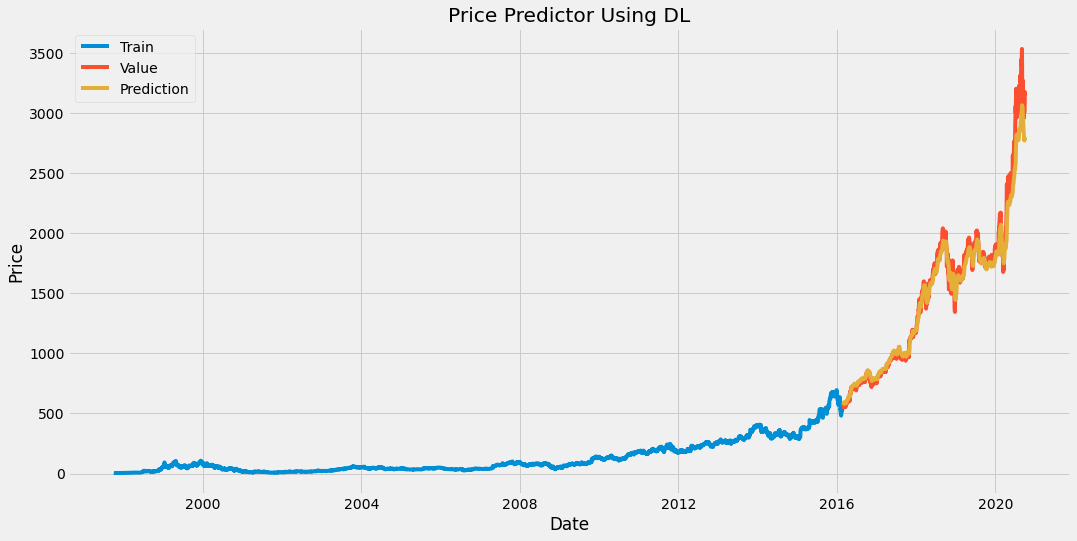

In [17]:
plt.figure(figsize=(16,8))
plt.title('Price Predictor Using DL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value','Prediction'])
plt.show()

In [18]:
valid

,Close,prediction
2016-02-26,555.229980,568.340088
2016-02-29,552.520020,571.801880
2016-03-01,579.039978,573.795959
2016-03-02,580.210022,578.520813
2016-03-03,577.489990,584.021118
...,...,...
2020-09-23,2999.860107,2777.999512
2020-09-24,3019.790039,2773.043457
2020-09-25,3095.129883,2769.773682
2020-09-28,3174.050049,2776.572510


In [19]:
newdf=data[-60:].values
scalednewdf=scaler.transform(newdf)

In [20]:
xtest=[]
xtest.append(scalednewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [21]:
pred=model.predict(xtest)
pred=scaler.inverse_transform(pred)
print('Next Day Prediction:  ' , pred)

1/1 [==============================] - 0s 69ms/step
Next Day Prediction:   [[2812.9792]]
